In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from google.colab import files

In [ ]:
files.upload()

Saving SupplyData.csv to SupplyData.csv


{'SupplyData.csv': b'Date,Supply,72 Day Temperature,72 Day Precipitation,Harvest Volume (tons/day)\r\n2/8/2021,"42,880,791",15.41,0.26,2.51\r\n2/9/2021,"42,698,507",15.37,0.26,2.66\r\n2/10/2021,"41,714,308",15.38,0.2,2.91\r\n2/11/2021,"41,718,366",15.36,0.17,2.77\r\n2/12/2021,"43,395,733",15.29,0.17,2.4\r\n2/16/2021,"44,081,811",15.21,0.17,3.04\r\n2/17/2021,"45,027,805",15.2,0.16,3.29\r\n2/18/2021,"45,531,183",15.2,0.11,3.02\r\n2/19/2021,"45,293,691",15.22,0.07,2.62\r\n2/22/2021,"45,705,370",15.23,0.06,2.52\r\n2/23/2021,"43,531,725",15.26,0.06,2.84\r\n2/24/2021,"43,942,638",15.3,0.06,2.88\r\n2/25/2021,"43,211,912",15.32,0.06,2.87\r\n2/26/2021,"44,330,965",15.39,0.06,2.73\r\n3/1/2021,"47,570,368",15.6,0.06,2.41\r\n3/2/2021,"46,847,343",15.68,0.06,2.81\r\n3/3/2021,"46,499,437",15.73,0.06,2.87\r\n3/4/2021,"46,268,134",15.77,0.06,2.95\r\n3/5/2021,"46,004,391",15.82,0.06,2.57\r\n3/8/2021,"45,208,794",15.97,0.06,2.33\r\n3/9/2021,"45,367,085",16.04,0.06,2.87\r\n3/10/2021,"44,228,226",16.13,0.

In [ ]:
data = pd.read_csv('SupplyData.csv')

In [ ]:
# Convert Date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by Date
data = data.sort_values('Date')

# Feature Selection (Supply is the target variable)
features = ['72 Day Temperature', '72 Day Precipitation', 'Harvest Volume (tons/day)']

target = 'Supply'

In [ ]:
# Remove commas and convert to float
data['Supply'] = data['Supply'].str.replace(',', '').astype(float)


In [ ]:
# Create the target variable (y)
y = data[target].astype(float)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(y))
y_train, y_test = y[:train_size], y[train_size:]

# Fit the ETS model with multiplicative seasonality and trend
model = ExponentialSmoothing(y_train, trend='mul', seasonal='mul', seasonal_periods=72)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(len(y_test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


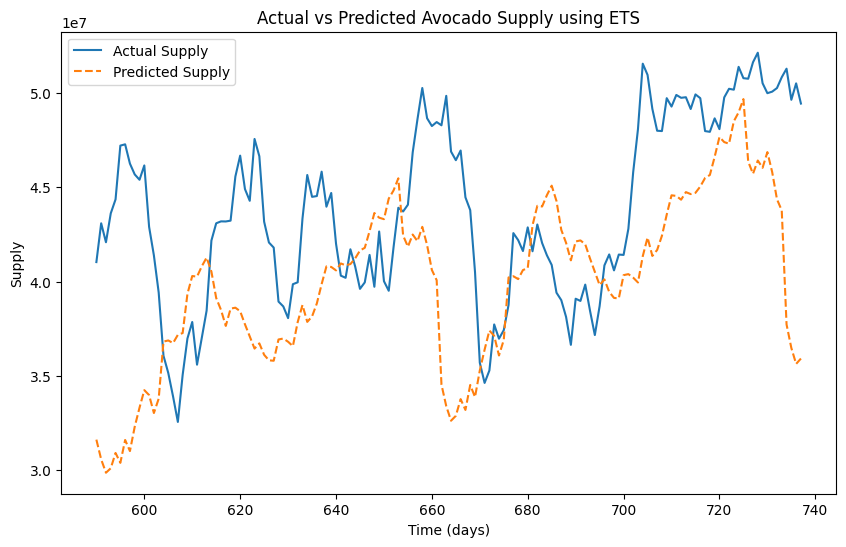

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Supply')
plt.plot(y_test.index, predictions, label='Predicted Supply', linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Supply')
plt.title('Actual vs Predicted Avocado Supply using ETS')
plt.legend()
plt.show()

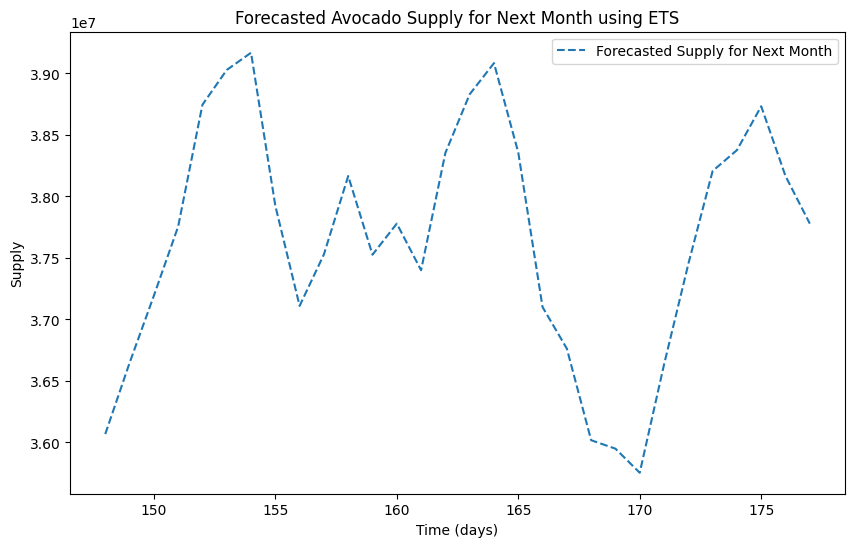

In [ ]:
# Forecasting for the next month (assuming 30 days forecast)
forecast = model_fit.forecast(30)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test), len(y_test) + 30), forecast, label='Forecasted Supply for Next Month', linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Supply')
plt.title('Forecasted Avocado Supply for Next Month using ETS')
plt.legend()
plt.show()